# 1D-signal data augmentation for regression problem
https://github.com/fdesmond/seme-ts

In [1]:
# standard module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# tsmall module
from tsmall import *

## The energy dataset
As a first example, we consider the [Appliances energy prediction Data Set](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction). The dataset is ready-to-use, however, we filter the most important features following the related publication [Data driven prediction models of energy use of appliances in a low-energy house](https://www.sciencedirect.com/science/article/pii/S0378778816308970?via%3Dihub).

The `data_A` is a filtered version of the original dataset. Observe that
- the target variable `Y` is given by the `Appliances` feature
- the `date` column is used as a index: we are not going to exploit the time-series properties of the features, but only ther 1d-signal nature (see below in Data Augmentation to build `data_C`)

In [2]:
energy = pd.read_csv('energy_data.csv', parse_dates=['date'])
energy.set_index('date', inplace=True)

# most important columns, Appliances put in the end
ts_index = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Tdewpoint', 'Appliances']

data_A = energy[ts_index].iloc[:3000]
display(data_A.head(), data_A.describe())

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Appliances
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,5.3,60
2016-01-11 17:10:00,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,5.2,60
2016-01-11 17:20:00,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,5.1,50
2016-01-11 17:30:00,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,5.0,50
2016-01-11 17:40:00,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,4.9,60


,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Appliances
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,19.985448,42.404261,19.144152,41.777696,19.923394,42.782183,18.505366,42.877009,17.623151,54.113587,...,19.043099,47.413737,16.717727,44.636169,4.308017,758.938183,86.622667,4.868500,2.165483,97.293333
std,1.504955,3.162049,1.541294,2.958891,1.117463,2.463655,1.573419,3.738311,1.186378,7.936050,...,1.234576,4.172057,0.741570,4.180920,4.351197,6.986667,8.878213,2.766209,4.460055,123.315353
min,16.790000,32.023333,16.100000,30.160000,17.200000,35.030000,15.100000,35.090000,15.330000,37.608333,...,16.306667,35.982778,14.890000,34.730000,-5.000000,733.500000,51.000000,0.000000,-6.600000,10.000000
25%,18.890000,39.900000,18.066667,39.400000,19.200000,40.590000,17.517500,39.317500,16.838056,50.290000,...,18.109722,44.790000,16.290000,41.284167,0.900000,755.200000,82.000000,2.833333,-1.200000,40.000000
50%,19.848333,42.700000,19.033333,41.933333,19.890000,43.400000,18.600000,43.400000,17.576389,52.430556,...,18.893056,47.474167,16.890000,45.278333,4.800000,760.241667,88.666667,4.333333,2.500000,50.000000
75%,21.100000,44.705833,20.323333,44.090000,20.633333,44.590000,19.566667,46.126667,18.215000,55.444444,...,19.790000,50.366389,17.166667,48.290000,7.837500,764.133333,93.000000,6.666667,6.000000,90.000000
max,23.790000,63.360000,22.790000,50.260000,23.390000,50.163333,22.463333,51.090000,21.996667,91.293333,...,22.760000,58.780000,18.500000,53.326667,13.100000,770.700000,100.000000,12.000000,10.700000,1080.000000


#### quick EDA 
A few plots to grasp the dataset structure.

Text(0.5, 1.0, 'Appliances histogram')

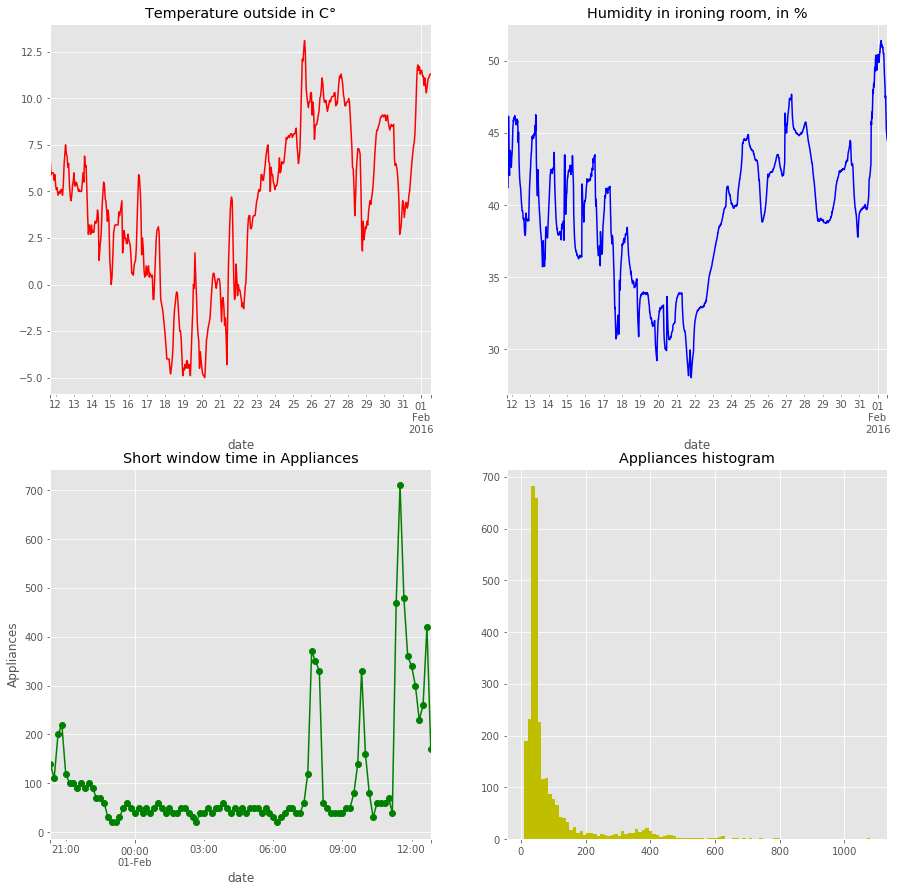

In [3]:
fig, ax = plt.subplots(figsize=[15,15], nrows=2, ncols=2)
data_A.T_out.plot(ax=ax[0,0], title='Temperature outside in C°', color='r')
data_A.RH_7.plot(ax=ax[0,1], title='Humidity in ironing room, in %', color='b')
data_A.Appliances.iloc[-100:].plot(marker='o', color='g', title='Short window time in Appliances', ax=ax[1,0]).set(ylabel='Appliances')
data_A.Appliances.hist(bins=100, ax=ax[1,1], color='y').set_title('Appliances histogram')

### obtaining `data_B` and `data_C` 
#### subsampling procedure
We perform a block sampling by randomly selecting a few blocks(i.e., consecutive rows) of fixed length from `data_A`. This operation is performed by `block_sampling()` function in `tsmall.preprocessing`. We then *check* that the sampling procedure has more or less kept the statistical properties of the target feature.

(300, 24)

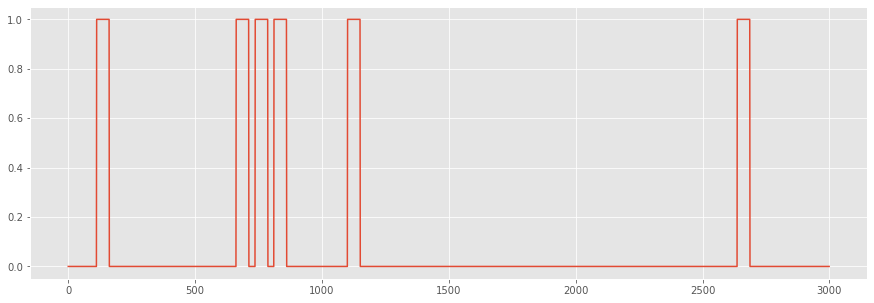

In [4]:
# we subsample 5 blocks of length 60 from data_A
indices_B = block_sampling(data_A.shape[0], 6, 50)
data_B = data_A[indices_B]
display(data_B.shape)

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(indices_B)

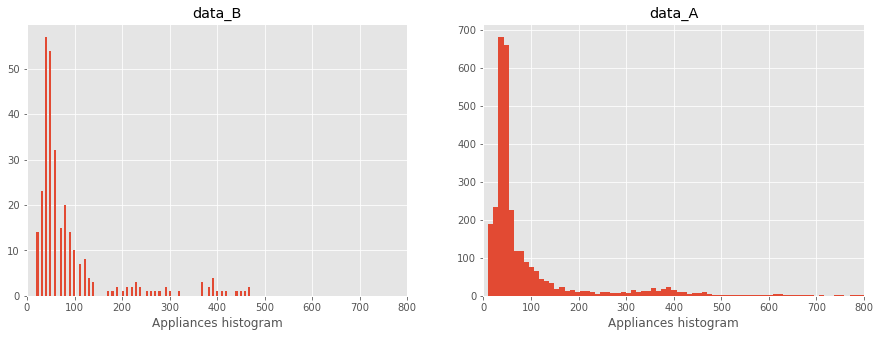

In [5]:
# visually check that the data_B has a similar Appliances histogram
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=2)
ax[0].set(title='data_B', xlabel='Appliances histogram', xlim=[0,800])
ax[1].set(title='data_A', xlabel='Appliances histogram', xlim=[0,800])

data_B.Appliances.hist(bins=100, ax=ax[0])
data_A.Appliances.hist(bins=100, ax=ax[1])

#### data augmentation
Data augmentation is performed by `dfaug()` and `tsaug()` functions in `tsmall.augment`. The output, `data_C`, is a dataframe consisting in the original dataframe, i.e., `data_B`, plus a distorted version of it. The distortion is made by the function `tsaug()` applied to a randomly selected time window of a feature (iterating on time-windows and features): it consists in applying white noise to the phase at the level of the [FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) and inverting the signal back using the inverse FFT (IFFT).

In [6]:
data_C = dfaug(data_B, sigma=0.3)     # sigma tunes the distortion

/Users/fdesmond/Dropbox/Coding/SEME ts/tsmall/augment.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  X_dist[i:i+t_int, j] = tsaug(X_dist[i:i+t_int, j], sigma=sigma)


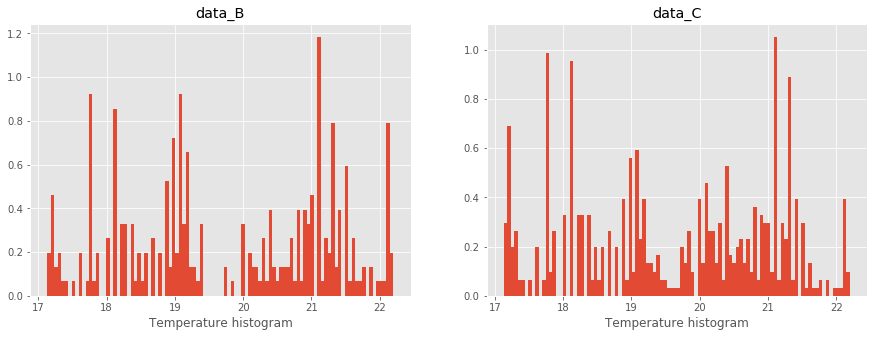

In [7]:
# visually check that the data_B has a similar Appliances histogram
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=2)
ax[0].set(title='data_B', xlabel='Temperature histogram')
ax[1].set(title='data_C', xlabel='Temperature histogram')

data_B.T2.hist(bins=100, ax=ax[0], density=True)
data_C.T2.hist(bins=100, ax=ax[1], density=True)

### train-test split 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y_A = data_A.Appliances
X_A = data_A.drop(columns='Appliances')

xtrain_A, xtest_A, ytrain_A, ytest_A = train_test_split(X_A, y_A, random_state=42)

In [10]:
y_B = data_B.Appliances
X_B = data_B.drop(columns='Appliances')

xtrain_B, xtest_B, ytrain_B, ytest_B = train_test_split(X_B, y_B, random_state=42)

In [11]:
y_C = data_C.Appliances
X_C = data_C.drop(columns='Appliances')

xtrain_C, xtest_C, ytrain_C, ytest_C = train_test_split(X_C, y_C, random_state=42)

### model fitting

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf_A = RandomForestRegressor()
rf_A.fit(xtrain_A, ytrain_A)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
# data B
#indices_B = block_sampling(data_A.shape[0], 6, 50)
#data_B = data_A[indices_B]
data_B = data_A.sample(400)

y_B = data_B.Appliances
X_B = data_B.drop(columns='Appliances')

xtrain_B, xtest_B, ytrain_B, ytest_B = train_test_split(X_B, y_B, random_state=42)

rf_B = RandomForestRegressor()
rf_B.fit(xtrain_B, ytrain_B)


# data C
data_C = dfaug(data_B, sigma=1)     # sigma tunes the distortion

y_C = data_C.Appliances
X_C = data_C.drop(columns='Appliances')

xtrain_C, xtest_C, ytrain_C, ytest_C = train_test_split(X_C, y_C, random_state=42)

rf_C = RandomForestRegressor()
rf_C.fit(xtrain_C, ytrain_C)

/Users/fdesmond/Dropbox/Coding/SEME ts/tsmall/augment.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  X_dist[i:i+t_int, j] = tsaug(X_dist[i:i+t_int, j], sigma=sigma)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
display('test_B R2 score: {}'.format(rf_B.score(xtest_B, ytest_B)),\
        'test_A R2 score: {}'.format(rf_B.score(xtest_A, ytest_A)))

'test_B R2 score: -0.010770535981635021'

'test_A R2 score: 0.2549566668593527'

In [47]:
display('test_B R2 score: {}'.format(rf_C.score(xtest_B, ytest_B)),\
        'test_A R2 score: {}'.format(rf_C.score(xtest_A, ytest_A)))

'test_B R2 score: 0.4589575951525434'

'test_A R2 score: 0.3000308410951167'

In [15]:
display('train_A R2 score: {}'.format(rf_A.score(xtrain_A, ytrain_A)),\
        'test_A R2 score: {}'.format(rf_A.score(xtest_A, ytest_A)))

'train_A R2 score: 0.9451806534501823'

'test_A R2 score: 0.6297508859766288'

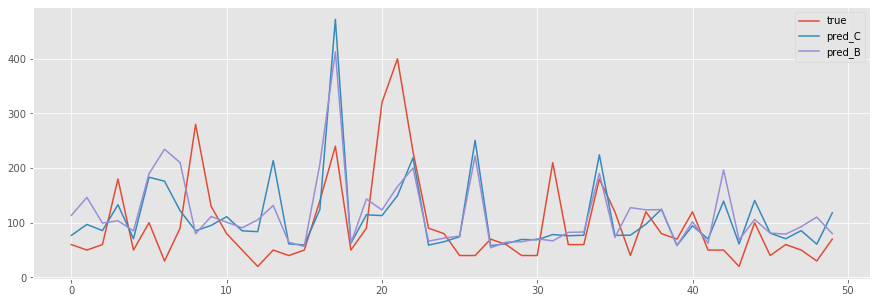

In [63]:
plt.rcParams['figure.figsize'] = [15, 5]
s=200
i=50
plt.plot(range(i), ytest_A[s:s+i], label = "true")
plt.plot(range(i), rf_C.predict(xtest_A[s:s+i]), label = "pred_C")
plt.plot(range(i), rf_B.predict(xtest_A[s:s+i]), label = "pred_B")
#plt.plot(range(i), rf_A.predict(xtest_A[s:s+i]), label = "pred_A")
plt.legend()